In [64]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sundipta/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [217]:
import os
import re

from gensim import corpora, models, similarities
from collections import defaultdict

from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile
from gensim.models import LsiModel

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from pprint import pprint  # pretty-printer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
bill_info = pd.read_csv("/Users/sundipta/Insight_notebooks/bill_descriptions.csv", index_col = 0)
bill_info.head()

,Active,Agency,Bill_ID,LongDescription,ShortDescription
0,True,House,1031,Concerning the use of unmanned aerial systems ...,UAVs near marine species
1,True,House,1032,Concerning the excise taxation of martial arts.,Martial arts excise taxation
2,False,House,1037,Concerning notice sent by and certain release ...,Tow truck notices & info.
3,True,House,1037,Concerning notice sent by and certain release ...,Tow truck notices & info.
4,False,House,1045,Addressing licensing and enforcement provision...,Uniform money services act


In [14]:
bill_info_subset = bill_info[~bill_info['LongDescription'].isnull()]

In [31]:
documents = bill_info_subset['LongDescription'].tolist()

In [274]:
stoplist = set('for a of the and to in by or an is concerning addressing regarding'.split())
word_list = [word for line in documents for word in line.split() if word.lower() not in stoplist]

In [275]:
word_list

['use',
 'unmanned',
 'aerial',
 'systems',
 'near',
 'certain',
 'protected',
 'marine',
 'species.',
 'excise',
 'taxation',
 'martial',
 'arts.',
 'notice',
 'sent',
 'certain',
 'release',
 'information',
 'affecting',
 'registered',
 'tow',
 'truck',
 'operators.',
 'notice',
 'sent',
 'certain',
 'release',
 'information',
 'affecting',
 'registered',
 'tow',
 'truck',
 'operators.',
 'licensing',
 'enforcement',
 'provisions',
 'applicable',
 'money',
 'transmitters',
 'currency',
 'exchanges',
 'under',
 'uniform',
 'money',
 'services',
 'act.',
 'licensing',
 'enforcement',
 'provisions',
 'applicable',
 'money',
 'transmitters',
 'currency',
 'exchanges',
 'under',
 'uniform',
 'money',
 'services',
 'act.',
 'certificates',
 'academic',
 'individual',
 'achievement.',
 'certificates',
 'academic',
 'individual',
 'achievement.',
 'Washington',
 'state',
 'credit',
 'union',
 'act.',
 'age',
 'individuals',
 'at',
 'which',
 'sale',
 'distribution',
 'tobacco',
 'vapor',
 'p

In [276]:
word_dist = nltk.FreqDist(word_list)

In [278]:
common_words = word_dist.most_common(50)

In [279]:
zip(*common_words)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

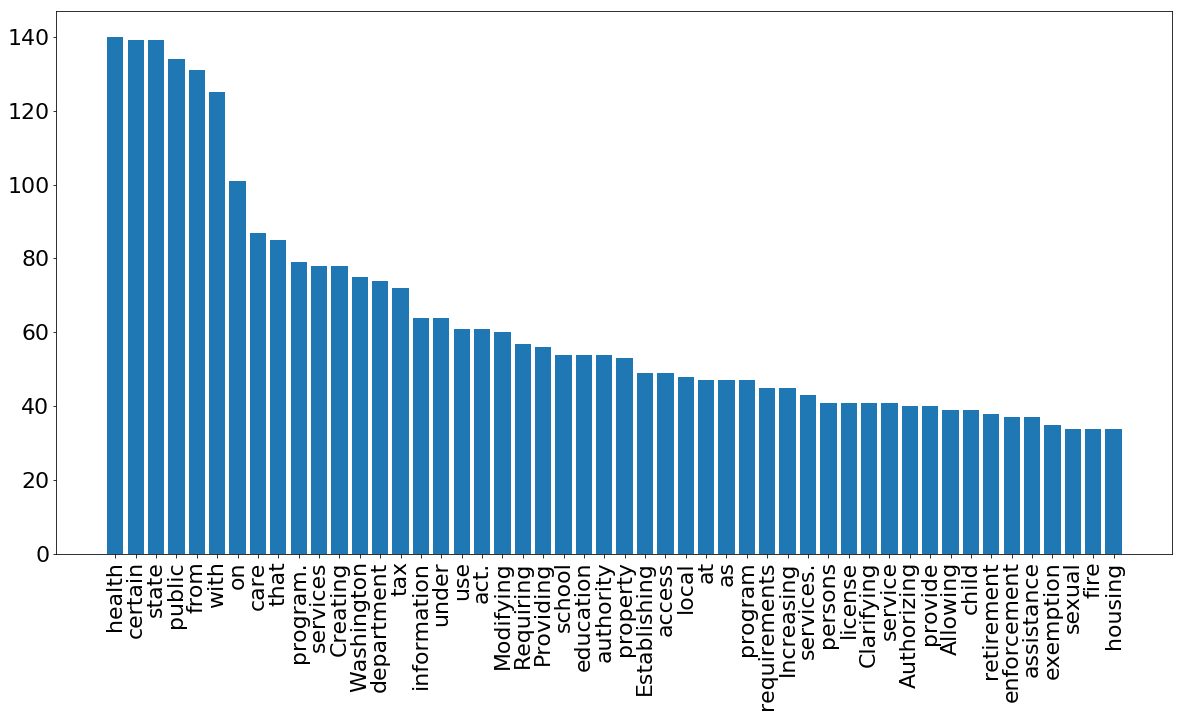

In [289]:
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.figsize' : (20, 10)})
plt.bar(*zip(*common_words))
plt.xticks(rotation='vertical')

In [158]:
#remove common words and tokenize
stoplist = set('for a of the and to in or an is concerning addressing regarding'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

pprint(texts)

[['use', 'unmanned', 'systems', 'certain', 'marine'],
 ['excise', 'taxation', 'martial', 'arts.'],
 ['notice',
  'sent',
  'by',
  'certain',
  'release',
  'information',
  'affecting',
  'registered',
  'tow',
  'truck',
  'operators.'],
 ['notice',
  'sent',
  'by',
  'certain',
  'release',
  'information',
  'affecting',
  'registered',
  'tow',
  'truck',
  'operators.'],
 ['licensing',
  'enforcement',
  'provisions',
  'applicable',
  'money',
  'transmitters',
  'currency',
  'exchanges',
  'under',
  'uniform',
  'money',
  'services',
  'act.'],
 ['licensing',
  'enforcement',
  'provisions',
  'applicable',
  'money',
  'transmitters',
  'currency',
  'exchanges',
  'under',
  'uniform',
  'money',
  'services',
  'act.'],
 ['certificates', 'academic', 'individual', 'achievement.'],
 ['certificates', 'academic', 'individual', 'achievement.'],
 ['washington', 'state', 'credit', 'union', 'act.'],
 ['age',
  'individuals',
  'at',
  'which',
  'sale',
  'distribution',
  'toba

  'events,',
  'jurisdictional',
  'requirements.'],
 ['increasing',
  'marijuana',
  'license',
  'fees',
  'adding',
  'temporary',
  'additional',
  'fee',
  'on',
  'marijuana',
  'licenses',
  'issued',
  'by',
  'washington',
  'state',
  'liquor',
  'cannabis',
  'board.'],
 ['providing', 'assault', 'against', 'utility'],
 ['university',
  "washington's",
  'alternative',
  'process',
  'awarding',
  'contracts.'],
 ['modifying',
  'who',
  'eligible',
  'relocation',
  'assistance',
  'tenants',
  'closed',
  'converted',
  'mobile',
  'home',
  'parks.'],
 ['modifying',
  'who',
  'eligible',
  'relocation',
  'assistance',
  'tenants',
  'closed',
  'converted',
  'mobile',
  'home',
  'parks.'],
 ['use',
  'credit',
  'cards',
  'purchases',
  'spirits',
  'wine',
  'by',
  'purchaser',
  'licensed',
  'sell',
  'spirits',
  'and/or',
  'wine',
  'consumption',
  'on',
  'licensed',
  'premises.'],
 ['use',
  'credit',
  'cards',
  'purchases',
  'spirits',
  'wine',
  'by',

  'applicants.'],
 ['preventing',
  'public',
  'identification',
  'stigmatization',
  'public',
  'school',
  'students.'],
 ['preventing',
  'public',
  'identification',
  'stigmatization',
  'public',
  'school',
  'students.'],
 ['requiring',
  'retailers',
  'post',
  'total',
  'sale',
  'price',
  'spirits',
  'sale.'],
 ['requiring',
  'retailers',
  'post',
  'total',
  'sale',
  'price',
  'spirits',
  'sale.'],
 ['drug',
  'gene',
  'therapy',
  'payment',
  'medicaid',
  'managed',
  'care',
  'organizations.'],
 ['drug',
  'gene',
  'therapy',
  'payment',
  'medicaid',
  'managed',
  'care',
  'organizations.'],
 ['prohibiting',
  'county',
  'state',
  'their',
  'capacity',
  'on',
  'election',
  'materials.'],
 ['through', 'collaborative', 'drug', 'therapy', 'agreements.'],
 ['removing',
  'health',
  'coverage',
  'barriers',
  'accessing',
  'substance',
  'use',
  'disorder',
  'treatment',
  'services.'],
 ['removing',
  'health',
  'coverage',
  'barriers',
  '

  'information',
  'technology',
  'security',
  'matters.'],
 ['theatrical', 'wrestling.'],
 ['theatrical', 'wrestling.'],
 ['opioid', 'treatment', 'programs.'],
 ['opioid', 'treatment', 'programs.'],
 ['increasing',
  'number',
  'members',
  'on',
  'board',
  'osteopathic',
  'medicine',
  'surgery.'],
 ['increasing',
  'number',
  'members',
  'on',
  'board',
  'osteopathic',
  'medicine',
  'surgery.'],
 ['adding',
  'use',
  'shared',
  'leave',
  'employees',
  'who',
  'are',
  'sick',
  'temporarily',
  'disabled',
  'because',
  'pregnancy',
  'disability',
  'purposes',
  'parental',
  'leave',
  'bond',
  'with',
  "employee's",
  'newborn,',
  'adoptive,',
  'foster',
  'child.'],
 ['adding',
  'use',
  'shared',
  'leave',
  'employees',
  'who',
  'are',
  'sick',
  'temporarily',
  'disabled',
  'because',
  'pregnancy',
  'disability',
  'purposes',
  'parental',
  'leave',
  'bond',
  'with',
  "employee's",
  'newborn,',
  'adoptive,',
  'foster',
  'child.'],
 ['r

  'from',
  'public',
  'disclosure',
  'information',
  'public',
  'private',
  'computer',
  'telecommunications',
  'networks.'],
 ['sexually', 'children', 'statewide', 'committee.'],
 ['crossing',
  'certain',
  'public',
  'roadways',
  'by',
  'wheeled',
  'all-terrain',
  'vehicles.'],
 ['crossing',
  'certain',
  'public',
  'roadways',
  'by',
  'wheeled',
  'all-terrain',
  'vehicles.'],
 ['delivery',
  'insurance',
  'notices',
  'documents',
  'by',
  'electronic',
  'means.'],
 ['delivery',
  'insurance',
  'notices',
  'documents',
  'by',
  'electronic',
  'means.'],
 ['compliance', 'with', 'apprenticeship', 'utilization', 'requirements.'],
 ['removing',
  'references',
  'specific',
  'nonoperational',
  'historical',
  'facilities',
  'from',
  'state',
  'statute.'],
 ['national', 'fire', 'incident', 'reporting', 'system.'],
 ['national', 'fire', 'incident', 'reporting', 'system.'],
 ['improving',
  'transitions',
  'extended',
  'foster',
  'care',
  'increase',
  '

  'respect',
  'research',
  'licenses,',
  'local',
  'authority',
  'notifications,',
  'retail',
  'licensing',
  'application',
  'process,',
  'processor',
  'wholesale',
  'events,',
  'jurisdictional',
  'requirements.'],
 ['provisions',
  'marijuana',
  'with',
  'respect',
  'research',
  'licenses,',
  'local',
  'authority',
  'notifications,',
  'retail',
  'licensing',
  'application',
  'process,',
  'processor',
  'wholesale',
  'events,',
  'jurisdictional',
  'requirements.'],
 ['expanding', 'powers', 'liquor', 'enforcement', 'officers.'],
 ['expanding', 'powers', 'liquor', 'enforcement', 'officers.'],
 ['county', 'boards', 'equalization.'],
 ['county', 'boards', 'equalization.'],
 ['modifying',
  'washington',
  'main',
  'street',
  'program',
  'by',
  'increasing',
  'total',
  'amount',
  'tax',
  'credits',
  'allowed',
  'under',
  'program',
  'making',
  'administrative',
  'changes',
  'program.'],
 ['modifying',
  'washington',
  'main',
  'street',
  'progr

  'purposes',
  'care',
  'coordination',
  'treatment.'],
 ['specifying',
  'whom',
  'information',
  'records',
  'related',
  'mental',
  'health',
  'services',
  'may',
  'be',
  'disclosed',
  'purposes',
  'care',
  'coordination',
  'treatment.'],
 ['expanding',
  'patient',
  'access',
  'health',
  'services',
  'through',
  'telemedicine',
  'by',
  'defining',
  'where',
  'patient',
  'may',
  'receive',
  'service.'],
 ['program.'],
 ['promoting',
  'completion',
  'environmental',
  'impact',
  'statements',
  'within',
  'two',
  'years.'],
 ['promoting',
  'completion',
  'environmental',
  'impact',
  'statements',
  'within',
  'two',
  'years.'],
 ['providing',
  'sales',
  'use',
  'tax',
  'form',
  'tax',
  'encourage',
  'electric',
  'generation',
  'plants',
  'natural',
  'plants',
  'energy',
  'facilities.'],
 ['expanding',
  'uses',
  'surplus',
  'funds',
  'from',
  'education',
  'card',
  'fees',
  'certain',
  'safety',
  'programs',
  'activities.']

 ['adding',
  'attempted',
  'murder',
  'list',
  'offenses',
  'that',
  'may',
  'be',
  'prosecuted',
  'at',
  'any',
  'time',
  'after',
  'their',
  'commission.'],
 ['crimes', 'against'],
 ['hospital', 'safety', 'net', 'assessment.'],
 ['hospital', 'safety', 'net', 'assessment.'],
 ['board', 'pilotage', 'commissioners.'],
 ['board', 'pilotage', 'commissioners.'],
 ['eligibility', 'veteran', 'national', 'guard', 'tuition'],
 ['minimum',
  'retirement',
  'allowance',
  'under',
  "teachers'",
  'retirement',
  'system,',
  'plan',
  '1.'],
 ['minimum',
  'retirement',
  'allowance',
  'under',
  "teachers'",
  'retirement',
  'system,',
  'plan',
  '1.'],
 ['licensing', 'spirits'],
 ['promoting', 'healthy', 'outcomes', 'pregnant', 'women', 'infants.'],
 ['promoting', 'healthy', 'outcomes', 'pregnant', 'women', 'infants.'],
 ['expanding',
  'high',
  'occupancy',
  'vehicle',
  'lane',
  'access',
  'blood-collecting',
  'distributing',
  'establishment',
  'vehicles.'],
 ['expa

  'warrants',
  'by',
  'district',
  'municipal',
  'court',
  'judges.'],
 ['issuance',
  'search',
  'warrants',
  'by',
  'district',
  'municipal',
  'court',
  'judges.'],
 ['establishing', 'washington', 'state', "women's", 'commission.'],
 ['improving',
  'updating',
  'administrative',
  'provisions',
  'related',
  'board',
  'tax'],
 ['improving', 'access', 'mental', 'health', 'services', 'children', 'youth.'],
 ['improving', 'access', 'mental', 'health', 'services', 'children', 'youth.'],
 ['providing',
  'list',
  'foster',
  'parent',
  'rights',
  'responsibilities',
  'prospective',
  'current',
  'foster'],
 ['membership',
  'law',
  'enforcement',
  "officers'",
  "firefighters'",
  'retirement',
  'system',
  'plan',
  '2',
  'firefighters',
  'employed',
  'by',
  'department',
  'corrections',
  'department',
  'social',
  'health',
  'services',
  'serving',
  'at',
  'prison',
  'civil',
  'commitment',
  'center',
  'located',
  'on',
  'island.'],
 ['membership'

  'harassment',
  'sexual',
  'assault',
  'mandatory',
  'employment',
  'contracts',
  'agreements.'],
 ["employee's",
  'right',
  'file',
  'complaint',
  'cause',
  'action',
  'sexual',
  'harassment',
  'sexual',
  'assault',
  'mandatory',
  'employment',
  'contracts',
  'agreements.'],
 ['increasing', 'commercial', 'fishing', 'license', 'fees', 'nonresidents.'],
 ['increasing', 'commercial', 'fishing', 'license', 'fees', 'nonresidents.'],
 ['clarifying',
  'existing',
  'law',
  'by',
  'creating',
  'new',
  'intrastate',
  'food',
  'safety',
  'security',
  'chapter',
  'from',
  'existing',
  'intrastate',
  'food',
  'safety',
  'laws',
  'moving',
  'certain',
  'provisions',
  'intrastate',
  'commerce',
  'food,',
  'drugs,',
  'cosmetics',
  'act',
  'titles',
  'agencies',
  'that',
  'administer',
  'provisions.'],
 ['clarifying',
  'existing',
  'law',
  'by',
  'creating',
  'new',
  'intrastate',
  'food',
  'safety',
  'security',
  'chapter',
  'from',
  'exis

In [249]:
# a different tokenizer to try later
def stemTokenizer(text):
    #set stop words 
    stop_words = set(stopwords.words('english'))
    stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '},','concerning', 'addressing', 'regarding']) # remove it if you need punctuation 
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stop_words]
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]     
            
    #stem tokens
    sb_stemmer = SnowballStemmer("english")
    stemmed_tokens = [sb_stemmer.stem(i) for i in filtered_tokens]
    
    return stemmed_tokens

#get tokens
stemmed_tokens = [stemTokenizer(x) for x in documents]

In [159]:
dictionary = corpora.Dictionary(texts)
#dictionary.save(os.path.join(, 'long_bill_descriptions.dict'))  # store the dictionary, for future reference
print(dictionary)

Dictionary(2528 unique tokens: ['certain', 'marine', 'systems', 'unmanned', 'use']...)


In [257]:
fdist = nltk.FreqDist(dictionary)

In [265]:
fdist = []
for word, frequency in word_dist.most_common(50):
    freq_dict = {word: frequency}
    fdist.append(freq_dict)

In [245]:
fdist

[{1979: 'zoning'},
 {1194: 'youth.'},
 {1128: 'youth,'},
 {278: 'youth'},
 {1289: 'years.'},
 {528: "years'"},
 {1372: 'years'},
 {2233: 'yearly'},
 {1419: 'year.'},
 {1222: 'year'},
 {2295: 'wrongful'},
 {1127: 'written'},
 {2025: 'writing'},
 {1463: 'wrestling.'},
 {1216: 'world'},
 {629: 'worksheet.'},
 {620: 'works'},
 {2285: 'workplace.'},
 {506: 'workplace'},
 {1034: 'working'},
 {2191: 'workforce.'},
 {731: 'workforce'},
 {487: 'workfirst'},
 {1680: "workers'"},
 {1632: 'workers'},
 {511: 'worker'},
 {575: 'work'},
 {673: 'women.'},
 {845: "women's"},
 {1893: 'women'},
 {1794: 'wolves.'},
 {1176: 'wolves'},
 {1505: 'wolf'},
 {302: 'witnessing'},
 {477: 'without'},
 {392: 'within'},
 {1968: 'withdrawing'},
 {1675: 'withdrawal'},
 {95: 'with'},
 {2416: 'wireless'},
 {1253: 'winery'},
 {1045: 'wine,'},
 {799: 'wine'},
 {2007: 'willful'},
 {1599: 'wildlife'},
 {1517: 'wildland'},
 {1755: 'wildfire'},
 {1374: 'wild'},
 {1964: 'whose'},
 {428: 'whom'}]

In [147]:
#gives each token a unique id
print(dictionary.token2id)

{'aerial': 0, 'certain': 1, 'concern': 2, 'marin': 3, 'near': 4, 'protect': 5, 'speci': 6, 'system': 7, 'unman': 8, 'use': 9, 'art': 10, 'excis': 11, 'martial': 12, 'taxat': 13, 'affect': 14, 'inform': 15, 'notic': 16, 'oper': 17, 'regist': 18, 'releas': 19, 'sent': 20, 'tow': 21, 'truck': 22, 'act': 23, 'address': 24, 'applic': 25, 'currenc': 26, 'enforc': 27, 'exchang': 28, 'licens': 29, 'money': 30, 'provis': 31, 'servic': 32, 'transmitt': 33, 'uniform': 34, 'academ': 35, 'achiev': 36, 'certif': 37, 'individu': 38, 'credit': 39, 'state': 40, 'union': 41, 'washington': 42, 'age': 43, 'distribut': 44, 'made': 45, 'may': 46, 'product': 47, 'sale': 48, 'tobacco': 49, 'vapor': 50, 'delay': 51, 'implement': 52, 'levi': 53, 'lid': 54, 'revis': 55, 'school': 56, 'administr': 57, 'marijuana': 58, 'medic': 59, 'purpos': 60, 'student': 61, 'agreement': 62, 'allow': 63, 'border': 64, 'cascad': 65, 'counti': 66, 'eighteen': 67, 'enter': 68, 'feder': 69, 'fifti': 70, 'fuel': 71, 'held': 72, 'hund

In [148]:
#THIS IS WHAT YOU WANT TO DO TO YOUR INPUT DATA
new_bill = "Excess greenhouse emissions"
new_vec = dictionary.doc2bow(new_bill.lower().split())
print(new_vec)

[(740, 1)]


In [162]:
corpus = [dictionary.doc2bow(text) for text in stemmed_tokens]
#corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'deerwester.mm'), corpus)  # store to disk, for later use
for c in corpus:
    print(c)

[(0, 1), (4, 1), (560, 1), (1480, 1)]
[(7, 1)]
[(0, 1), (16, 1), (17, 1), (18, 1), (2043, 1)]
[(0, 1), (16, 1), (17, 1), (18, 1), (2043, 1)]
[(25, 2), (30, 1), (678, 1), (2100, 1)]
[(25, 2), (30, 1), (678, 1), (2100, 1)]
[]
[]
[(35, 1), (36, 1), (37, 1), (38, 1), (678, 1), (2100, 1)]
[(39, 1), (45, 1), (47, 1), (48, 1), (49, 1), (683, 1)]
[(56, 1), (1804, 1)]
[(56, 1), (1804, 1)]
[(58, 1), (218, 1)]
[(58, 1), (218, 1)]
[(68, 1), (69, 1), (72, 1), (73, 1), (77, 1), (78, 1), (79, 1), (80, 1), (83, 1), (86, 1), (92, 1), (93, 1), (94, 1), (188, 1), (319, 1), (685, 1), (1353, 1), (1530, 2), (2206, 1)]
[(96, 1), (1277, 1)]
[(103, 1), (923, 1), (1609, 1), (2485, 1)]
[(103, 1), (923, 1), (1609, 1), (2485, 1)]
[(279, 1)]
[(279, 1)]
[(112, 1), (115, 1), (2011, 1)]
[(122, 1), (124, 1), (130, 1), (592, 1)]
[(130, 1)]
[(136, 1), (1987, 1)]
[(136, 1), (1987, 1)]
[(45, 1), (58, 1), (73, 1), (139, 1), (140, 2), (141, 1)]
[(4, 1), (58, 1), (140, 1), (144, 1), (709, 1), (1804, 1)]
[(4, 1), (58, 1), (140

[(578, 1), (866, 1), (1376, 1), (2121, 2)]
[(388, 1), (391, 1), (1987, 1), (2117, 1), (2121, 1), (2209, 1)]
[(205, 1), (1481, 1), (1619, 1), (2484, 1), (2485, 1)]
[(36, 1), (38, 1), (709, 1), (1539, 1)]
[(36, 1), (38, 1), (709, 1), (1539, 1)]
[]
[(56, 1), (276, 1), (447, 1), (592, 1), (1804, 1)]
[(56, 1), (276, 1), (447, 1), (592, 1), (1804, 1)]
[(2474, 1)]
[(2474, 1)]
[(56, 1), (545, 1), (634, 1), (712, 1)]
[(188, 1), (1211, 1), (1440, 1), (1570, 1), (1733, 1)]
[(188, 1), (1211, 1), (1440, 1), (1570, 1), (1733, 1)]
[(2156, 1)]
[(746, 1)]
[(746, 1)]
[(356, 1), (883, 1)]
[(678, 1), (1480, 1), (2477, 1)]
[(678, 1), (1480, 1), (2477, 1)]
[(1312, 1)]
[(1312, 1)]
[(36, 1), (252, 1), (610, 1)]
[(36, 1), (252, 1), (610, 1)]
[(278, 1), (580, 1), (1193, 1), (1715, 1)]
[(278, 1), (580, 1), (1193, 1), (1715, 1)]
[(0, 1), (276, 1), (2354, 1)]
[(0, 1), (276, 1), (2354, 1)]
[(4, 1), (103, 1), (157, 1)]
[(36, 1), (212, 1), (1276, 1), (2043, 1)]
[(36, 1), (212, 1), (1276, 1), (2043, 1)]
[(278, 1), (74

In [171]:
#tf-idf model
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

#lda model
#lda = models.ldamodel.LdaModel(tfidf_corpus, num_topics=20, id2word = dictionary, passes=20)
#lda_corpus = lda[model_corpus]

#lsi model
lsi = models.LsiModel(tfidf_corpus, num_topics=50, id2word=dictionary)
lsi_corpus = lsi[tfidf_corpus]
num=100

#get cosine similarity
index = similarities.MatrixSimilarity(lsi_corpus, num_features=num)

In [172]:
index

In [219]:
index.save('lsi_index')

In [166]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.4132873427787309), (4, 0.5017727746250384), (560, 0.5422665355351836), (1480, 0.5323200723086213)]
[(7, 1.0)]
[(0, 0.24322282714071441), (16, 0.5702328761543944), (17, 0.44246815123651373), (18, 0.4547747739315607), (2043, 0.4616047697405268)]
[(0, 0.24322282714071441), (16, 0.5702328761543944), (17, 0.44246815123651373), (18, 0.4547747739315607), (2043, 0.4616047697405268)]
[(25, 0.8711180762279445), (30, 0.34846353439882405), (678, 0.2482091034564234), (2100, 0.24107821018201295)]
[(25, 0.8711180762279445), (30, 0.34846353439882405), (678, 0.2482091034564234), (2100, 0.24107821018201295)]
[]
[]
[(35, 0.4757159732060668), (36, 0.2482453486275227), (37, 0.6497923628791691), (38, 0.313026607430343), (678, 0.31420036687729197), (2100, 0.30517358561994806)]
[(39, 0.3759186145590911), (45, 0.3258837665214001), (47, 0.3317468206890737), (48, 0.5241621471427648), (49, 0.49327296143470095), (683, 0.35265399746581244)]
[(56, 0.598419751791093), (1804, 0.8011827511038208)]
[(56, 0.598419

[]
[]
[(56, 0.5827905113742573), (712, 0.812622433761296)]
[(36, 0.24376486713522746), (38, 0.30737691478175283), (247, 0.45616934417841626), (575, 0.3628105843017448), (610, 0.34450927091022926), (883, 0.40479865178164687), (1423, 0.47310415865105154)]
[(276, 0.47403180601524114), (972, 0.8805077210825177)]
[(72, 0.6345681092297427), (136, 0.2079666412331652), (188, 0.2540104632003715), (392, 0.19620938285760275), (448, 0.16662359475760868), (908, 0.21152270307658091), (2117, 0.32613506582838586), (2205, 0.2811939328994048), (2206, 0.43944779921745525)]
[(38, 0.4937152765346345), (1281, 0.8696236115218636)]
[(286, 0.2510663895337223), (414, 0.41816319670100077), (746, 0.3850270828322293), (1277, 0.4034980910232696), (1480, 0.3233771393342886), (1700, 0.5886220100824929)]
[(286, 0.2510663895337223), (414, 0.41816319670100077), (746, 0.3850270828322293), (1277, 0.4034980910232696), (1480, 0.3233771393342886), (1700, 0.5886220100824929)]
[(2209, 1.0)]
[(2209, 1.0)]
[(36, 0.50998100496046

[(245, 0.6682986526477486), (2117, 0.7438930775784944)]
[(245, 0.6682986526477486), (2117, 0.7438930775784944)]
[(276, 0.31111993375984776), (286, 0.32946289465269474), (414, 0.5487363620363499), (746, 0.5052533613327436), (1501, 0.48812501852026713)]
[(276, 0.31111993375984776), (286, 0.32946289465269474), (414, 0.5487363620363499), (746, 0.5052533613327436), (1501, 0.48812501852026713)]
[(590, 0.41306058683752445), (1262, 0.535976593519997), (2515, 0.7362812253481275)]
[(590, 0.41306058683752445), (1262, 0.535976593519997), (2515, 0.7362812253481275)]
[(1147, 0.5049661296879122), (1169, 0.6103315524647281), (1312, 0.6103315524647281)]
[(115, 0.425781237488684), (864, 0.3677759373637847), (1257, 0.5694734316901349), (1934, 0.5992922561637648)]
[(212, 0.50506067059467), (1868, 0.5668960700256414), (1985, 0.6508014787997529)]
[(212, 0.50506067059467), (1868, 0.5668960700256414), (1985, 0.6508014787997529)]
[(56, 0.3192713736628545), (136, 0.4948573343860423), (284, 0.5228337709189363), 

In [167]:
for doc in lsi_corpus: # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
    print(doc)

[(0, -0.01803242163019243), (1, 0.0019908213889126406), (2, 0.007636721332010345), (3, -0.0055096629152926345), (4, -0.03579064399815859), (5, 0.014313384487511491), (6, -0.02070220408377997), (7, 0.003978928438350243), (8, 0.02756072786649326), (9, 0.008906476439181283), (10, 0.02642242036967179), (11, -0.018415704707821223), (12, 0.036252145341462205), (13, -0.011539331220256114), (14, 0.005514958195267292), (15, -0.029937111639460997), (16, 0.01544572980445847), (17, -0.0023627611020356812), (18, 0.011596180723056992), (19, 0.0018581711620191082), (20, 0.017173205825834356), (21, -0.002803674913573138), (22, -0.0033029799699070867), (23, -0.0084279995064084), (24, 0.004659958549110621), (25, 0.0067031750456139), (26, 0.010721562714099343), (27, -0.0012092046168828015), (28, -0.00536268938574761), (29, 0.007138672605911658), (30, 0.0006375575543541936), (31, 0.0029446570692291266), (32, 0.009160133153831337), (33, 0.003721237223020611), (34, -0.0019351379200074576), (35, -0.008126826

[(0, -0.007968440774457993), (1, 0.0010289661306259418), (2, 0.002477208536258192), (3, -0.0028672639760696263), (4, -0.015793764358623646), (5, 0.007975695516576847), (6, -0.011484268754735514), (7, 0.0014869234184661808), (8, 0.010767787350726084), (9, 0.0032116266730827484), (10, 0.022400963688596807), (11, -0.006644052547141016), (12, 0.027803940811609248), (13, -0.015360767008146505), (14, 0.005841619762868362), (15, -0.0065057809337715974), (16, -0.004674732817823277), (17, 0.0035340319260106093), (18, -0.0030197490665191573), (19, -0.0009369348646707936), (20, 0.007848730614640283), (21, 0.0018170599522279078), (22, 0.003028669463800301), (23, -0.004586701330828047), (24, 0.004392084997375472), (25, 0.0033290121767830037), (26, 0.004558102731414487), (27, -0.0037336333080798343), (28, -5.0317040412216135e-05), (29, 0.0013746917922305914), (30, -0.0020290495084413418), (31, 0.0009220506764321865), (32, 0.0049136059865091345), (33, 0.004268494799387442), (34, -0.002843162189072496

[(0, -0.01211148324266547), (1, 0.001499921893477287), (2, 0.0041502750587085495), (3, -0.004172426543660237), (4, -0.024014856959921508), (5, 0.011414195588739552), (6, -0.01645288446724096), (7, 0.002376457430222344), (8, 0.016971836118227994), (9, 0.0051921680465494505), (10, 0.029445769839415565), (11, -0.010739483142990449), (12, 0.03720338713087844), (13, -0.01894401430155155), (14, 0.007417937202468282), (15, -0.012773334209813598), (16, -0.002170514268859176), (17, 0.003406991051792024), (18, -0.0010951627866117098), (19, -0.0006696883585032469), (20, 0.011817976287004367), (21, 0.0014504664780369105), (22, 0.0026774445390320336), (23, -0.006601407660798319), (24, 0.005674621586575412), (25, 0.004902426755428743), (26, 0.007005115458106771), (27, -0.004302035295180176), (28, -0.0010717567209569596), (29, 0.0028531807433511414), (30, -0.0020924480521803818), (31, 0.0015641613460428945), (32, 0.007096830662086666), (33, 0.005361806398336928), (34, -0.0034683366481199096), (35, -0

[(0, -0.022980012135946755), (1, 0.002927136021661794), (2, 0.00738617737733221), (3, -0.008152091273780141), (4, -0.04555321589311067), (5, 0.022555423589865158), (6, -0.032488739320910835), (7, 0.004361340902682005), (8, 0.03143385343917574), (9, 0.009457371714790774), (10, 0.06170701808791844), (11, -0.01956379620606063), (12, 0.07700265422148904), (13, -0.04152902652824215), (14, 0.015927638311507265), (15, -0.020576461349899072), (16, -0.01037753157687851), (17, 0.00895610385059216), (18, -0.006510550040726979), (19, -0.0022275163582075783), (20, 0.02256461712628273), (21, 0.004415382535165907), (22, 0.00752295941460831), (23, -0.012994727782896745), (24, 0.012036607217145764), (25, 0.00950143788434701), (26, 0.013193514180832505), (27, -0.009903870264048237), (28, -0.0007711109906451824), (29, 0.004444817376887807), (30, -0.0052278624089528245), (31, 0.0027614204004806813), (32, 0.01393656918493094), (33, 0.011601587598630891), (34, -0.007662772587185736), (35, -0.014513481917465

[(0, -0.014517596134008008), (1, 0.001794572872722332), (2, 0.004994804597843907), (3, -0.00499168646792594), (4, -0.02878622859137262), (5, 0.013644958284872518), (6, -0.019669362088878477), (7, 0.0028546267752874834), (8, 0.020375006215713698), (9, 0.006239817452258835), (10, 0.03505631681399807), (11, -0.012906353051660468), (12, 0.04433146074585258), (13, -0.022478581464295377), (14, 0.00881566088989721), (15, -0.015460920216704314), (16, -0.0023451646956289614), (17, 0.003981705023045497), (18, -0.0011310494188222797), (19, -0.0007635114375050753), (20, 0.014159980334123853), (21, 0.0016704466418148152), (22, 0.0031092292461865822), (23, -0.007893629017966336), (24, 0.006749920112112815), (25, 0.005868176036743389), (26, 0.008400787048686674), (27, -0.005085322011682245), (28, -0.0013364192566005656), (29, 0.0034597104775792612), (30, -0.0024565912514340495), (31, 0.0018833625014877898), (32, 0.008487399253897725), (33, 0.006368463020112159), (34, -0.004113019151613198), (35, -0.0

In [168]:
lsi.print_topics(2)

[(0,
  '-0.472*"public" + -0.337*"health" + -0.318*"program" + -0.311*"state" + -0.200*"address" + -0.190*"care" + -0.184*"school" + -0.177*"washington" + -0.168*"certain" + -0.150*"act"'),
 (1,
  '0.698*"public" + -0.431*"state" + -0.289*"program" + 0.243*"school" + -0.232*"washington" + -0.127*"act" + -0.124*"care" + 0.121*"district" + -0.084*"establish" + -0.073*"access"')]

In [205]:
new_bill = "school fund"
vec_bow = dictionary.doc2bow(new_bill.lower().split())
vec_lsi = lsi[vec_bow] # convert the query to LSI space
print(vec_lsi)

[(0, 0.22350126446856278), (1, -0.21345975807634057), (2, 0.13328735358284916), (3, 0.26389452195289215), (4, -0.2383358259913369), (5, 0.6321828255248436), (6, -0.05441415781863887), (7, -0.007369813527131654), (8, -0.45997729490951533), (9, 0.006109113125613973), (10, 0.0963149824607892), (11, 0.05770765193537966), (12, 0.16558008996153425), (13, -0.04245545259208511), (14, 0.2373949489636002), (15, 0.1906987900396828), (16, -0.10607541261216978), (17, -0.004160792128539606), (18, -0.11132415598393101), (19, 0.06938577601131313), (20, 0.01758106601716877), (21, -0.0689307866246879), (22, 0.0170307301783283), (23, 0.03098866189002312), (24, -0.001650748357460409), (25, 0.08609540377643875), (26, -0.0686126523958634), (27, 0.1123274922585219), (28, 0.11364021341175244), (29, 0.13983716408717162), (30, 0.06790787329115623), (31, 0.009366583527538948), (32, 0.1411800974128276), (33, 0.048950338713561276), (34, -0.13215090773784668), (35, 0.11592682261046527), (36, 0.05761630770141754), (

In [206]:
sims = index[vec_lsi] # perform a similarity query against the corpus
print(list(enumerate(sims))) 

[(0, 0.016573295), (1, -0.10694194), (2, -0.066884786), (3, -0.066884786), (4, 0.037989438), (5, 0.037989438), (6, 0.0), (7, 0.0), (8, -0.0041375738), (9, 0.018237147), (10, 0.74140954), (11, 0.74140954), (12, -0.0729303), (13, -0.0729303), (14, -0.029940225), (15, 0.05281901), (16, 0.41590613), (17, 0.41590613), (18, 0.011831544), (19, 0.011831544), (20, -0.0015825666), (21, 0.040412046), (22, -0.045882408), (23, 0.0065730438), (24, 0.0065730438), (25, -0.05853409), (26, -0.015997), (27, -0.015997), (28, -0.0033158772), (29, -0.0033158772), (30, 0.20318557), (31, -0.027086636), (32, 0.008389756), (33, -0.10680464), (34, 0.027551461), (35, 0.0035549365), (36, 0.0035549365), (37, 0.0), (38, 0.0), (39, -0.046585064), (40, 0.005046658), (41, 0.034192618), (42, 0.034192618), (43, -0.020161893), (44, 0.034251392), (45, 0.0035234056), (46, 0.0035234056), (47, -0.024758423), (48, -0.01935894), (49, -0.01935894), (50, 0.004567072), (51, 0.004567072), (52, -1.8067658e-07), (53, 0.048454512), (5

In [207]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)

[(1316, 0.8822104), (1317, 0.8822104), (1942, 0.8202916), (1943, 0.8202916), (555, 0.8141042), (556, 0.8141042), (860, 0.8141042), (1763, 0.8141042), (1886, 0.8141042), (1887, 0.8141042), (1331, 0.7890802), (1189, 0.78318536), (1190, 0.78318536), (1736, 0.7800816), (572, 0.7754298), (573, 0.7754298), (1810, 0.7696318), (10, 0.74140954), (11, 0.74140954), (452, 0.7359218), (453, 0.7359218), (899, 0.7192621), (985, 0.6501088), (1403, 0.6338947), (1192, 0.61847156), (1193, 0.61847156), (535, 0.6161649), (536, 0.6161649), (1346, 0.6161649), (1659, 0.6161649), (630, 0.61440027), (631, 0.61440027), (596, 0.6101094), (576, 0.60961485), (577, 0.60961485), (1107, 0.60961485), (1582, 0.60156155), (1583, 0.60156155), (1283, 0.582446), (1284, 0.582446), (428, 0.5775976), (429, 0.5775976), (1584, 0.5696666), (1585, 0.5696666), (1876, 0.56065106), (1877, 0.56065106), (973, 0.55368924), (1162, 0.54167145), (1163, 0.54167145), (795, 0.5348664), (1487, 0.5348664), (961, 0.5273912), (962, 0.5273912), (1

In [216]:
type(index)

gensim.similarities.docsim.MatrixSimilarity

In [225]:
bill_info.iloc[sims[6][0]]['LongDescription']

'Concerning the siting of schools and school facilities.'

In [228]:
sims[:10]

[(1316, 0.8822104),
 (1317, 0.8822104),
 (1942, 0.8202916),
 (1943, 0.8202916),
 (555, 0.8141042),
 (556, 0.8141042),
 (860, 0.8141042),
 (1763, 0.8141042),
 (1886, 0.8141042),
 (1887, 0.8141042)]